# **Setup**

In [ ]:
%%time
%pip install git+https://github.com/envdmt/EDMT.git@francis &> /dev/null

CPU times: user 71.4 ms, sys: 10.7 ms, total: 82.1 ms
Wall time: 9.36 s


In [ ]:
import edmt

import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt
from edmt.conversion import * #sdf_to_gdf,generate_uuid,get_utm_epsg
from edmt.contrib.utils import clean_vars

In [1]:
print([func for func in dir(edmt) if callable(getattr(edmt, func))])
print(edmt.__version__)
edmt.init(silent=False)

NameError: name 'edmt' is not defined

# **Generate UUID**

In [ ]:
data = pd.DataFrame(
        {
            "name": ["Alice", "Bob", "Charlie"]
            }
        )
data

,name
0,Alice
1,Bob
2,Charlie


In [ ]:
generate_uuid(
    df=data,
    index=True
)

No UUID-like column found. Generating 'uuid' column in the DataFrame.


,uuid,name
0,c18a5bae-2925-42cb-9b18-b1ce5dd0b439,Alice
1,904339de-3bad-4e57-9f07-01cc27fb423d,Bob
2,b5369c4c-c59f-4ac4-b68a-84cb44faa38f,Charlie


# **Conversions**

In [ ]:
length_conversion(1, "meter", "kilometer")

0.001

In [ ]:
convert_time(120, "minutes", "SeCoNdS")

7200.0

In [ ]:
convert_speed(100, "km/h", "knot")

53.996

# **Class Mapping**

In [ ]:
# shp = gpd.read_file('https://www.dropbox.com/scl/fi/nzgus5jlvk8edktcf9nz5/Narok.geojson?rlkey=jufl5klgl6jftke8vprkze499&st=4incnanc&dl=1')

In [2]:
g_data = gpd.read_file('https://www.dropbox.com/scl/fi/qyjs3ddj5wge9rcd0l0eq/towns.geojson?rlkey=0hklua7msltxmn98qlyu0zgj6&dl=1')

NameError: name 'gpd' is not defined

In [ ]:
g_data.head()

,id,fid,AREA,PERIMETER,TOWN_NAME,TOWN_ID,TOWN_TYPE,geometry
0,kenya_all_towns.1,1,0,0,Msambweni,4,Market Centres,POINT (39.48000 -4.48000)
1,kenya_all_towns.2,2,0,0,Cheptais,4,Market Centres,POINT (34.45000 0.80000)
2,kenya_all_towns.3,3,0,0,Dadaab,3,Trading Centre,POINT (40.32000 0.07000)
3,kenya_all_towns.4,4,0,0,Eldas,4,Market Centres,POINT (39.55000 2.53000)
4,kenya_all_towns.5,5,0,0,Kathiani,3,Trading Centre,POINT (37.03000 -1.42000)


/usr/local/lib/python3.11/dist-packages/contextily/tile.py:614: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/edmt/mapping/maps.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax.legend(loc="lower right", bbox_to_anchor=(1, 0), frameon=True)


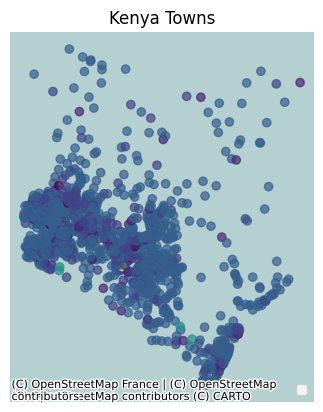

In [ ]:
m = edmt.mapping.Mapping()
m.gplot(g_data,column="TOWN_ID").add_legend().add_labels().add_title(title="Kenya Towns").add_grids()
m.add_basemap(cx.providers.OpenStreetMap.France)

/usr/local/lib/python3.11/dist-packages/contextily/tile.py:614: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


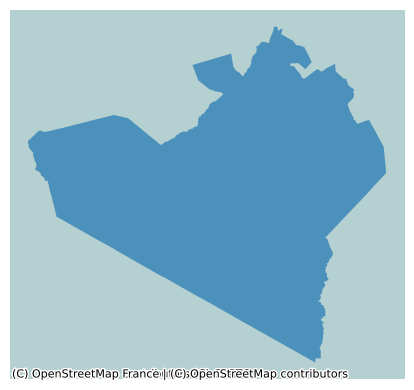

In [ ]:
s = edmt.mapping.Mapping()
s.gplot(
    gpd.read_file('https://www.dropbox.com/scl/fi/nzgus5jlvk8edktcf9nz5/Narok.geojson?rlkey=jufl5klgl6jftke8vprkze499&st=4incnanc&dl=1'),
    column="code")
s.add_basemap(cx.providers.OpenStreetMap.France)

# **Contextily**

In [ ]:
import pandas as pd
import contextily as cx

data = []

for provider in cx.providers.keys():
    for layer in cx.providers[provider].keys():
        data.append({
            "Provider": provider,
            "Layer": layer
        })
df = pd.DataFrame(data)
df.head(50)

,Provider,Layer
0,OpenStreetMap,Mapnik
1,OpenStreetMap,DE
2,OpenStreetMap,CH
3,OpenStreetMap,France
4,OpenStreetMap,HOT
5,OpenStreetMap,BZH
6,OpenStreetMap,CAT
7,MapTilesAPI,OSMEnglish
8,MapTilesAPI,OSMFrancais
9,MapTilesAPI,OSMEspagnol


# **QED**